### How to use **`exact_calculation()`**

In [1]:
import math
from passive_extended_matchgate_simulator.exact import exact_calculation
from passive_extended_matchgate_simulator.utils import (ucj_to_compatible,  
                                                        get_bitstrings_and_probs, 
                                                        make_parameterized_controlled_phase_circuit)

#### We'll create a circuit that has 12 qubits and 16 controlled-phase gates. Our matchgates will be initialized randomly, but our controlled-phase gate angles will be sampled from  $\sim \mathcal{N}(\pi, .1)$. For exact calculations, our only concern is the number of controlled-phase gates, not the extent of the circuit.

In [2]:
mean, var = math.pi, .1
norb, nelec = 6, (3,3)
circuit = make_parameterized_controlled_phase_circuit(norb, nelec, mean, var, reduced_interaction=False)
compatible = ucj_to_compatible(circuit)

#### For clarity, we'll draw the decomposed circuit, but use the original circuit for simulation since this is faster.

Our circuit contains the following gates:
OrderedDict({'xx_plus_yy': 60, 'p': 24, 'cp': 16, 'x': 6})


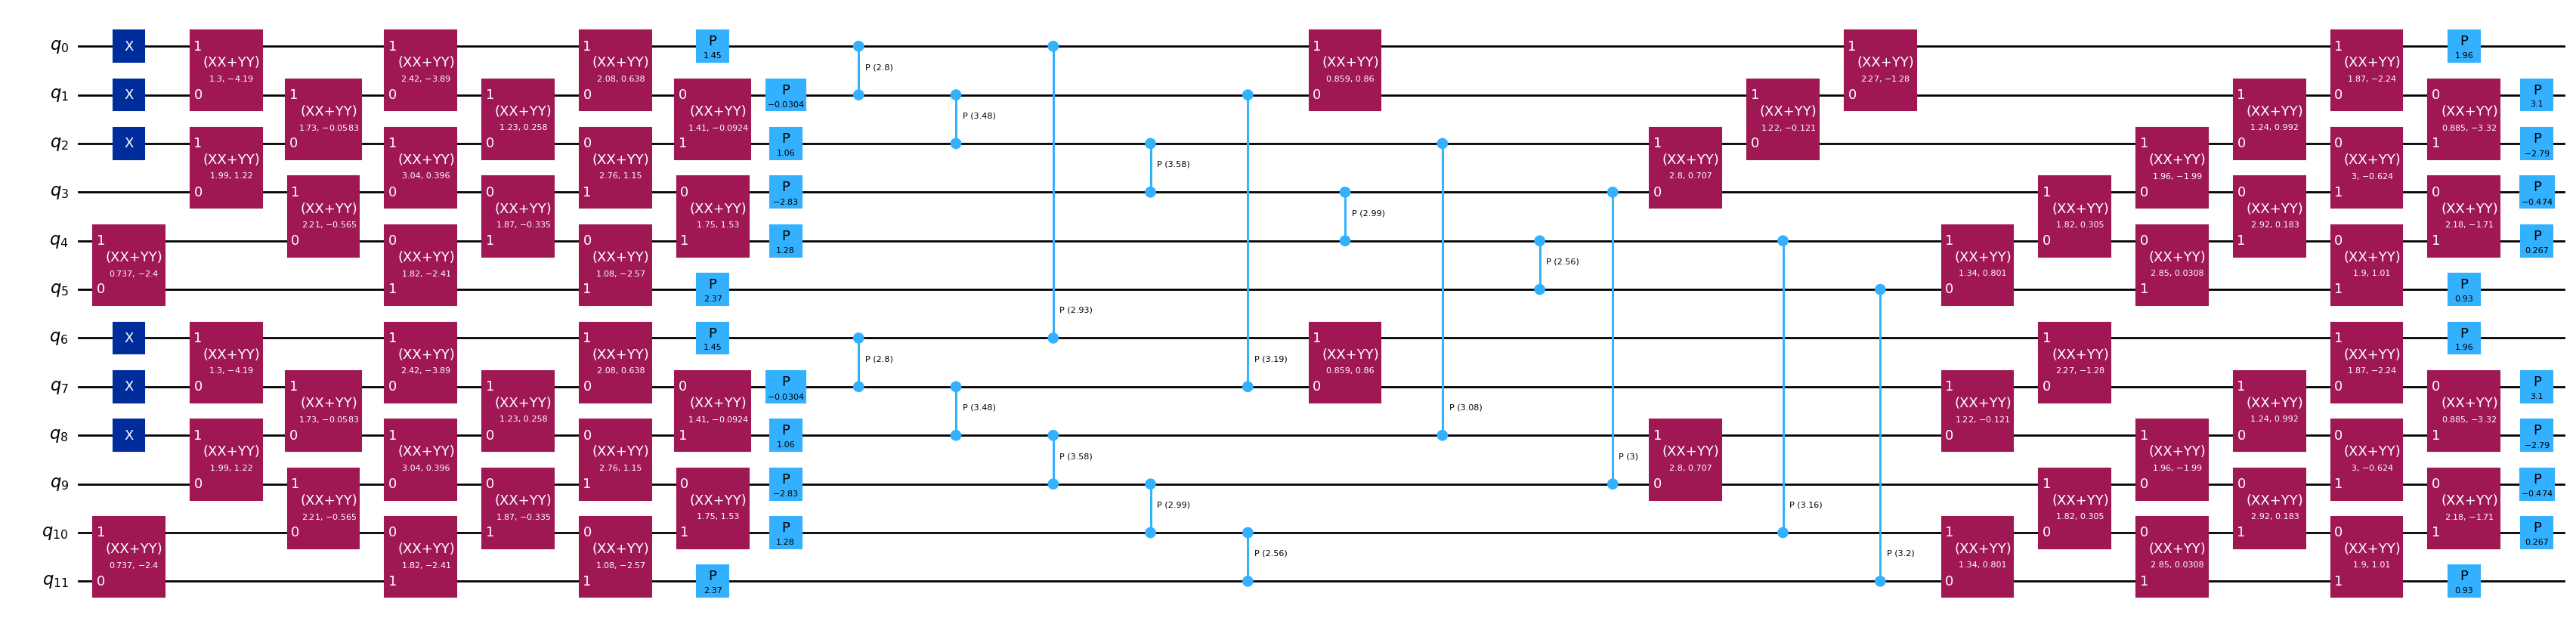

In [3]:
print("Our circuit contains the following gates:")
print(compatible.decompose(gates_to_decompose=['orb_rot_jw']).count_ops())
compatible.decompose(gates_to_decompose=['orb_rot_jw']).draw(fold=-1, output='mpl')

#### This circuit is small enough to be simulated by ffsim on a laptop, so we will use probabilities obtained from this library to validate the calculations obtained from our simulator.

In [4]:
bitstrings, ffsim_probs = get_bitstrings_and_probs(circuit, norb, nelec) # (Uses ffsim)
print(f"There are {len(bitstrings)} bitstrings in the support of this circuit.")

There are 400 bitstrings in the support of this circuit.


#### Let's use **`exact_calculation()`** to calculate these probabilities as well. We'll also check the largest difference between our calculations and the ffsim calculations.

In [5]:
import numpy as np
probs = exact_calculation(circuit=compatible, outcome_states=bitstrings)
print(max(abs(probs - ffsim_probs)))

2.5673907444456745e-16
